# Exploratory Data Analysis - Airbnb London Dataset

Portions of this EDA were based on the following articles:
* https://towardsdatascience.com/exploratory-data-analysis-eda-python-87178e35b14
* https://www.kaggle.com/ekami66/detailed-exploratory-data-analysis-with-python
* https://levelup.gitconnected.com/a-complete-exploratory-data-analysis-with-python-45a57f5ef4c9
* https://www.kaggle.com/ash316/eda-to-prediction-dietanic

## About London

Source: Wikipedia

![London](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Palace_of_Westminster_from_the_dome_on_Methodist_Central_Hall_%28cropped%29.jpg/1000px-Palace_of_Westminster_from_the_dome_on_Methodist_Central_Hall_%28cropped%29.jpg)

London is the capital and largest city of England and the United Kingdom. The city stands on the River Thames in the south-east of England, at the head of its 50-mile (80 km) estuary leading to the North Sea. London has been a major settlement for two millennia, and was originally called Londinium, which was founded by the Romans. The City of London, London's ancient core and financial centre—an area of just 1.12 square miles (2.9 km2) and colloquially known as the Square Mile—retains boundaries that closely follow its medieval limits. The adjacent City of Westminster has for centuries been the location of much of the national government. Thirty-one additional boroughs north and south of the river also comprise modern London. The London region is governed by the mayor of London and the London Assembly.

London is one of the world's most important global cities. It exerts a considerable impact upon the arts, commerce, education, entertainment, fashion, finance, healthcare, media, professional services, research and development, tourism and transportation. It is one of the largest financial centres in the world and in 2019, London had the second highest number of ultra high-net-worth individuals in Europe, after Paris. And in 2020, London had the second-highest number of billionaires of any city in Europe, after Moscow. London's universities form the largest concentration of higher education institutes in Europe, and London is home to highly ranked institutions such as Imperial College London in natural and applied sciences, the London School of Economics and social sciences, as well as the comprehensive University College London. In 2012, London became the first city to have hosted three modern Summer Olympic Games.

London has a diverse range of people and cultures, and more than 300 languages are spoken in the region. Its estimated mid-2018 municipal population (corresponding to Greater London) was roughly 9 million, which made it the third-most populous city in Europe. London accounts for 13.4% of the U.K. population. Greater London Built-up Area is the fourth-most populous in Europe, after Istanbul, Moscow, and Paris, with 9,787,426 inhabitants at the 2011 census. The London metropolitan area is the third-most populous in Europe, after Istanbul and the Moscow Metropolitan Area, with 14,040,163 inhabitants in 2016.

London contains four World Heritage Sites: the Tower of London; Kew Gardens; the site comprising the Palace of Westminster, Westminster Abbey, and St Margaret's Church; and the historic settlement in Greenwich where the Royal Observatory, Greenwich defines the Prime Meridian (0° longitude) and Greenwich Mean Time. Other landmarks include Buckingham Palace, the London Eye, Piccadilly Circus, St Paul's Cathedral, Tower Bridge, Trafalgar Square and The Shard. London has numerous museums, galleries, libraries and sporting events. These include the British Museum, National Gallery, Natural History Museum, Tate Modern, British Library and West End theatres. The London Underground is the oldest underground railway network in the world.

## London neighborhoods

![London_neighborhoods](https://assets.londonist.com/uploads/2016/08/i730/absolute_profit_from_airbnb_london.jpg)

## 1. Data import

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('bmh')
import warnings
warnings.filterwarnings('ignore')

### Let's look at the shape of the data

In [3]:
with pd.option_context('display.max_rows', 6, 'display.max_columns', None):  # show all df columns
    for name, df_ in dfdict.items():
        display(name)
        display(df_.shape)
        display(df_.head(6))

'calendar'

(27935194, 7)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,100326,2021-02-13,f,$33.00,$33.00,2.0,10.0
1,13913,2021-02-12,t,$40.00,$40.00,1.0,29.0
2,13913,2021-02-13,t,$40.00,$40.00,1.0,29.0
3,13913,2021-02-14,t,$40.00,$40.00,1.0,29.0
4,13913,2021-02-15,t,$40.00,$40.00,1.0,29.0
5,13913,2021-02-16,t,$40.00,$40.00,1.0,29.0


'listings'

(76534, 74)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,13913,https://www.airbnb.com/rooms/13913,20210209201301,2021-02-12,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,Finsbury Park is a friendly melting pot commun...,https://a0.muscache.com/pictures/miso/Hosting-...,54730,https://www.airbnb.com/users/show/54730,Alina,2009-11-16,"London, England, United Kingdom",I am a Multi-Media Visual Artist and Creative ...,within a few hours,100%,67%,f,https://a0.muscache.com/im/users/54730/profile...,https://a0.muscache.com/im/users/54730/profile...,LB of Islington,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,t,"Islington, Greater London, United Kingdom",Islington,NaN,51.56802,-0.11121,Private room in apartment,Private room,2,NaN,1 shared bath,1.0,0.0,"[""Oven"", ""Shampoo"", ""Refrigerator"", ""Hangers"",...",$40.00,1,29,1.0,1.0,29.0,29.0,1.0,29.0,NaN,t,30,60,90,365,2021-02-12,21,1,0,2010-08-18,2020-02-22,97.0,10.0,10.0,10.0,10.0,9.0,9.0,NaN,f,2,1,1,0,0.16
1,15400,https://www.airbnb.com/rooms/15400,20210209201301,2021-02-12,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,It is Chelsea.,https://a0.muscache.com/pictures/428392/462d26...,60302,https://www.airbnb.com/users/show/60302,Philippa,2009-12-05,"Kensington, England, United Kingdom","English, grandmother, I have travelled quite ...",within a few hours,100%,NaN,f,https://a0.muscache.com/im/users/60302/profile...,https://a0.muscache.com/im/users/60302/profile...,Chelsea,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"London, United Kingdom",Kensington and Chelsea,NaN,51.48796,-0.16898,Entire apartment,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Refrigerator"", ""Shampoo"", ""Long term stays a...",$75.00,10,50,10.0,10.0,50.0,50.0,10.0,50.0,NaN,t,16,16,16,189,2021-02-12,89,1,0,2009-12-21,2020-03-16,96.0,10.0,10.0,10.0,10.0,10.0,9.0,NaN,t,1,1,0,0,0.66
2,17402,https://www.airbnb.com/rooms/17402,20210209201301,2021-02-12,Superb 3-Bed/2 Bath & Wifi: Trendy W1,You'll have a wonderful stay in this superb mo...,"Location, location, location! You won't find b...",https://a0.muscache.com/pictures/39d5309d-fba7...,67564,https://www.airbnb.com/users/show/67564,Liz,2010-01-04,"London, England, United Kingdom",We are Liz and Jack. We manage a number of ho...,a few days or more,0%,100%,t,https://a0.muscache.com/im/users/67564/profile...,https://a0.muscache.com/im/users/67564/profile...,Fitzrovia,18.0,18.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"London, Fitzrovia, United Kingdom",Westminster,NaN,51.52195,-0.14094,Entire apartment,Entire home/apt,6,NaN,2 baths,3.0,3.0,"[""Oven"", ""Shampoo"", ""Refrigerator"", ""Hangers"",...",$307.00,4,365

'reviews'

(1163886, 6)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,13913,80770,2010-08-18,177109,Michael,My girlfriend and I hadn't known Alina before ...
1,13913,367568,2011-07-11,19835707,Mathias,Alina was a really good host. The flat is clea...
2,13913,529579,2011-09-13,1110304,Kristin,Alina is an amazing host. She made me feel rig...
3,13913,595481,2011-10-03,1216358,Camilla,"Alina's place is so nice, the room is big and ..."
4,13913,612947,2011-10-09,490840,Jorik,"Nice location in Islington area, good for shor..."
5,13913,4847959,2013-05-28,6405442,Vera,I'm very happy to have been Alina's guest! We'...


The main file is `listings`. Taking a quick look at its data, we can observe 76534 property listings on the London Airbnb dataset, which provides 74 columns of information, such as listing and picture URL's, the date when the listing was scraped from Airbnb's website, name and description of the property and a textual overview of its neighborhood, data about the host (id, url, name, location, short-bio, if the host was verified by Airbnb and some statistics about his/her response time). There are also columns containing geographical data about the property, such as latitude and longitude, its neighborhood, the property and room type (room, flat, etc.), how many persons it accommodates, how many beds, bedroom and bathrooms it has, room amenities, and, of course, information about price. The final group of columns regards several statistics about availability, guest reviews, and property rating (number of stars?).



## 2. Analyzing columns

Let's perform an initial analysis of columns, including data types, removal of irrelevant columns, or columns with too much missing values, and finally we'll setup an index for each dataframe.

### 2.1. Check data types
Let’s see how Pandas determined the types of each column when loading them

In [4]:
for name, df_ in dfdict.items():
    display(name)
    display(df_.info())

'calendar'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27935194 entries, 0 to 27935193
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   adjusted_price  object 
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 1.5+ GB


None

'listings'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76534 entries, 0 to 76533
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            76534 non-null  int64  
 1   listing_url                                   76534 non-null  object 
 2   scrape_id                                     76534 non-null  int64  
 3   last_scraped                                  76534 non-null  object 
 4   name                                          76510 non-null  object 
 5   description                                   73372 non-null  object 
 6   neighborhood_overview                         46750 non-null  object 
 7   picture_url                                   76534 non-null  object 
 8   host_id                                       76534 non-null  int64  
 9   host_url                                      76534 non-null 

None

'reviews'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1163886 entries, 0 to 1163885
Data columns (total 6 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   listing_id     1163886 non-null  int64 
 1   id             1163886 non-null  int64 
 2   date           1163886 non-null  object
 3   reviewer_id    1163886 non-null  int64 
 4   reviewer_name  1163885 non-null  object
 5   comments       1163374 non-null  object
dtypes: int64(3), object(3)
memory usage: 53.3+ MB


None

### 2.2. Dropping irrelevant information or with too much missing values 

From these informations above we can already see that some features won't be relevant in our exploratory analysis as there are too much missing values (such as `license` and `bathrooms`). Plus there is so much features to analyse that it may be better to concentrate on the ones which can give us real insights.

In [5]:
# Remove columns with almost no values: listings: bathrooms, neighbourhood_group_cleansed, calendar_updated, license
dfdict['listings'].drop(columns=['bathrooms', 'neighbourhood_group_cleansed', 'calendar_updated', 'license'], inplace=True)
# Remove irrelevant columns
dfdict['listings'].drop(columns=['listing_url', 'picture_url', 'host_url', 'host_name', 'host_thumbnail_url', 'host_picture_url'], inplace=True)
dfdict['listings'].drop(columns=['minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 
                                 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm'], inplace=True)

### 2.3. Analyzing the date column on calendar and reviews dataframes

In [6]:
print(dfdict['calendar']['date'].head())
print(dfdict['reviews']['date'].head())

0    2021-02-13
1    2021-02-12
2    2021-02-13
3    2021-02-14
4    2021-02-15
Name: date, dtype: object
0    2010-08-18
1    2011-07-11
2    2011-09-13
3    2011-10-03
4    2011-10-09
Name: date, dtype: object


We need to convert the following columns from object to datetime64: `calendar.date, reviews.date, listings: host_since, calendar_last_scraped, first_review, last_review.`

In [7]:
dfdict['calendar']['date'] = pd.to_datetime(dfdict['calendar']['date'])
dfdict['reviews']['date'] = pd.to_datetime(dfdict['reviews']['date'])
dfdict['listings']['last_scraped'] = pd.to_datetime(dfdict['listings']['last_scraped'])
dfdict['listings']['host_since'] = pd.to_datetime(dfdict['listings']['host_since'])
dfdict['listings']['calendar_last_scraped'] = pd.to_datetime(dfdict['listings']['calendar_last_scraped'])
dfdict['listings']['first_review'] = pd.to_datetime(dfdict['listings']['first_review'])
dfdict['listings']['last_review'] = pd.to_datetime(dfdict['listings']['last_review'])

We can see that the dataset date range is [2010-08-18, 2011-10-09]

### 2.4. Converting other columns

In [8]:
def convert_price(df_column):
    return df_column.str.replace('$', '', regex = 'true').str.replace(',', '', regex = 'true').astype(float)

In [9]:
dfdict['listings']['price'] = convert_price(dfdict['listings']['price'])
dfdict['calendar']['price'] = convert_price(dfdict['calendar']['price'])
dfdict['calendar']['adjusted_price'] = convert_price(dfdict['calendar']['adjusted_price'])

Other fields that need to be converted: 

% => host_response_rate, host_acceptance_rate;

int => accommodates, bathrooms, bedrooms, beds, minimum_nights, maximum_nights, availability_30, availability_60, availability_90, availability_365, number_of_reviews, number_of_reviews_ltm, number_of_reviews_l30d, calculated_host_listings_count, calculated_host_listings_count_entire_homes, calculated_host_listings_count_private_rooms, calculated_host_listings_count_shared_rooms);

? => license => we do not know its datatype and it does not contain enough data.

In [10]:
def convert_boolean(df_column):
    return df_column.replace({'f': 0, 't': 1}).astype('boolean')

In [11]:
# Convert t/f fields to boolean
# calendar dataframe : available
# listings dataframe : (host_is_superhost, host_has_profile_pic, host_identity_verified, calendar_updated, has_availability, instant_bookable)
dfdict['calendar']['available'] = convert_boolean(dfdict['calendar']['available'])
dfdict['listings']['host_is_superhost'] = convert_boolean(dfdict['listings']['host_is_superhost'])
dfdict['listings']['host_has_profile_pic'] = convert_boolean(dfdict['listings']['host_has_profile_pic'])
dfdict['listings']['host_identity_verified'] = convert_boolean(dfdict['listings']['host_identity_verified'])

In [12]:
dfdict['listings']['has_availability'] = convert_boolean(dfdict['listings']['has_availability'])
dfdict['listings']['instant_bookable'] = convert_boolean(dfdict['listings']['instant_bookable'])

In [13]:
# Convert 'host_acceptance_rate', 'host_response_rate', removing the %
dfdict['listings']['host_acceptance_rate'] = dfdict['listings']['host_acceptance_rate'].str.replace('%', '', regex = 'true').str.replace(',', '', regex = 'true').astype(float)
dfdict['listings']['host_response_rate'] = dfdict['listings']['host_response_rate'].str.replace('%', '', regex = 'true').str.replace(',', '', regex = 'true').astype(float)

In [14]:
# Convert % fields to float: listings.host_response_rate, listings.host_acceptance_rate
display(dfdict['calendar'].info())
# Convert floats to int: listings.bathrooms, listings.bedrooms, listings.beds
display(dfdict['listings'].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27935194 entries, 0 to 27935193
Data columns (total 7 columns):
 #   Column          Dtype         
---  ------          -----         
 0   listing_id      int64         
 1   date            datetime64[ns]
 2   available       boolean       
 3   price           float64       
 4   adjusted_price  float64       
 5   minimum_nights  float64       
 6   maximum_nights  float64       
dtypes: boolean(1), datetime64[ns](1), float64(4), int64(1)
memory usage: 1.3 GB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76534 entries, 0 to 76533
Data columns (total 58 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            76534 non-null  int64         
 1   scrape_id                                     76534 non-null  int64         
 2   last_scraped                                  76534 non-null  datetime64[ns]
 3   name                                          76510 non-null  object        
 4   description                                   73372 non-null  object        
 5   neighborhood_overview                         46750 non-null  object        
 6   host_id                                       76534 non-null  int64         
 7   host_since                                    76488 non-null  datetime64[ns]
 8   host_location                                 76307 non-null  obje

None

We have now converted all important columns from `object` to their appropriate datatype, except for columns containing large texts or arrays of values. Let's take a look at the index of each dataframe.

### 2.5. Check current indices

In [15]:
for name, df_ in dfdict.items():
    display(name, df_.index, '------------------------')

'calendar'

RangeIndex(start=0, stop=27935194, step=1)

'------------------------'

'listings'

RangeIndex(start=0, stop=76534, step=1)

'------------------------'

'reviews'

RangeIndex(start=0, stop=1163886, step=1)

'------------------------'

Let's look for candidate indices for each dataframe.

#### 2.5.1. Calendar dataframe

In [16]:
print(len(dfdict['calendar'].index))
print(dfdict['calendar'].groupby(['listing_id', 'date'])['available'].transform('nunique')) #count(distinct)
print(dfdict['calendar'].groupby(['listing_id', 'date'])['available'].count())

27935194
0           1
1           1
2           1
3           1
4           1
           ..
27935189    1
27935190    1
27935191    1
27935192    1
27935193    1
Name: available, Length: 27935194, dtype: int64
listing_id  date      
13913       2021-02-12    1
            2021-02-13    1
            2021-02-14    1
            2021-02-15    1
            2021-02-16    1
                         ..
48102989    2022-02-07    1
            2022-02-08    1
            2022-02-09    1
            2022-02-10    1
            2022-02-11    1
Name: available, Length: 27935194, dtype: int64


As seen above, `['listing_id', 'date']` is a good index for calendar table, i.e., they have a one-to-one correspondance with each line. Let's set this index.

In [17]:
# Calendar appears to have listing_id and date as index
dfdict['calendar'].set_index(['listing_id', 'date'], inplace=True)

#### 2.5.2. Listings and Reviews dataframes

These two dataframes have a predefined `id` field.

In [18]:
print('[Listings] number of records: ', len(dfdict['listings'].index))
print('[Listings] Unique id values: ', len(dfdict['listings']['id'].unique()))
print('[Reviews] Listings: number of records: ', len(dfdict['reviews'].index))
print('[Reviews] Unique id values: ', len(dfdict['reviews']['id'].unique()))

[Listings] number of records:  76534
[Listings] Unique id values:  76534
[Reviews] Listings: number of records:  1163886
[Reviews] Unique id values:  1163886


#### Observe that the dataset contains 76534 listed properties and over 1 million reviews. There are also 27 million lines on the calendar dataframe.

#### Both Listings and Reviews dataframes can have column 'id' as index, since it has unique values

Let's set `id` as index for these 2 dataframes.

In [19]:
dfdict['listings'].set_index('id', inplace=True)
dfdict['reviews'].set_index('id', inplace=True)

## 3. Data Cleaning

The next step in the process of EDA is Data Cleaning. It is very important to get rid of the irregularities and clean the data after sourcing it into our system.
Irregularities are of different types of data.

* Missing Values
* Incorrect Format
* Incorrect Headers
* Anomalies/Outliers

### 3.1. Check for null values

In [20]:
for name, df_ in dfdict.items():
    display(name)
    display(df_.isnull().sum())  # isna() does the same thing

'calendar'

available            0
price              513
adjusted_price     513
minimum_nights    2432
maximum_nights    2432
dtype: int64

'listings'

scrape_id                                           0
last_scraped                                        0
name                                               24
description                                      3162
neighborhood_overview                           29784
host_id                                             0
host_since                                         46
host_location                                     227
host_about                                      34104
host_response_time                              43221
host_response_rate                              43221
host_acceptance_rate                            34703
host_is_superhost                                  46
host_neighbourhood                              18594
host_listings_count                                46
host_total_listings_count                          46
host_verifications                                  0
host_has_profile_pic                               46
host_identity_verified      

'reviews'

listing_id         0
date               0
reviewer_id        0
reviewer_name      1
comments         512
dtype: int64

As we can see, on the `calendar` dataframe, 4 columns contain missing values. We'll simply ignore the NaN values when plotting the graphs and analyzing the data.

On the `listings` dataframe, we'll ignore pure textual columns (with large sentences/text), such as: `name, description, neighborhood_overview, host_about, host_neighborhood and neighborhood`. 

For now, we'll ignore the `reviews` dataframe, since it only contains textual (reviewer's comments) data.

Let’s see how to handle the other missing values:  

host_response_time                              43221

host_response_rate                              43221

host_acceptance_rate                            34703

host_is_superhost                                  46

bathrooms_text                                    181

bedrooms                                         4838

beds                                             1219

first_review                                    22194

last_review                                     22194

review_scores_rating                            23937

review_scores_accuracy                          23999

review_scores_cleanliness                       23990

review_scores_checkin                           24046

review_scores_communication                     23997

review_scores_location                          24045

review_scores_value                             24046

reviews_per_month                               22194

We can handle missing values by dropping the missing records or by imputing the values. Or we can simply choose to ignore them at this moment. **That's exactly what we are going to do.**

### 3.3. Handling Outliers

Let's take a look at some outliers, regarding property price.

Ouliers can be handled by dropping the records or imputing with the values or leaving them as is, if it makes more sense.

In [21]:
print(dfdict['listings']['price'].describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95, 0.98, 0.99, 0.997]))

count    76534.000000
mean       113.899051
std        313.830681
min          0.000000
25%         42.000000
50%         75.000000
75%        120.000000
90%        200.000000
95%        289.000000
98%        450.000000
99%        686.680000
99.7%     1250.000000
max      17746.000000
Name: price, dtype: float64


99.7% of all properties cost less than 1250 GBP. We could consider values above that as outliers.

Besides, 90% of all properties cost less than 200 GBP.

## 4. Feature analysis

### 4.1. Univariate Analysis

If we analyze data over a single variable/column from a dataset, it is known as Univariate Analysis.

#### 4.1.1. Categorical Unordered Univariate Analysis

An unordered variable is a categorical variable that has no defined order. If we take our data as an example, the neighbourhood_cleansed column in the dataset is divided into many sub-categories like ..., etc. There is no weight or measure given to any value in the ‘neighbourhood_cleansed’ column.
Now, let’s analyze the neighbourhood_cleansed category by using plots. Since neighbourhood_cleansed is a category, we will plot the bar plot.

Westminster               0.111153
Tower Hamlets             0.090038
Hackney                   0.074594
Kensington and Chelsea    0.069054
Camden                    0.067669
Islington                 0.058810
Lambeth                   0.056498
Southwark                 0.055701
Wandsworth                0.050762
Hammersmith and Fulham    0.045692
Brent                     0.030797
Haringey                  0.028327
Lewisham                  0.028053
Newham                    0.024068
Ealing                    0.022160
Barnet                    0.021402
Greenwich                 0.020357
Waltham Forest            0.017861
Merton                    0.016124
Croydon                   0.014882
Richmond upon Thames      0.014438
Hounslow                  0.013327
Redbridge                 0.009016
Enfield                   0.008663
Hillingdon                0.008140
Bromley                   0.007840
Kingston upon Thames      0.006729
Harrow                    0.005854
City of London      

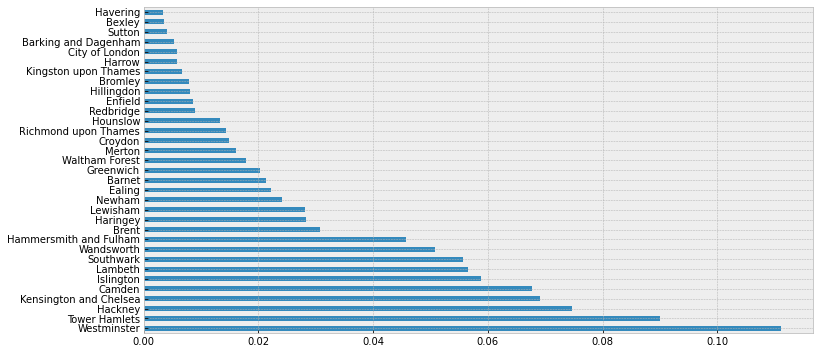

In [22]:
# Let's calculate the percentage of each job status category.
display(dfdict['listings'].neighbourhood_cleansed.value_counts(normalize=True))

# plot the bar graph of percentage job categories
plt.figure(figsize = (12, 6))
dfdict['listings'].neighbourhood_cleansed.value_counts(normalize=True).plot.barh()
plt.show()

By the above bar plot, we can infer that the data set contains more number of Westminster bnb's compared to other neighborhoods. Other neighborhoods are also frequent, such as Tower Hamlets, Hackney, Kensignton and Chelsea, Camden and Islington.

#### 4.1.2. Categorical Ordered Univariate Analysis

Ordered variables are those variables that have a natural rank of order. Some examples of categorical ordered variables from our dataset are:

property_type: Entire cottage, Campsite, Shared Room, ...

Bedrooms, beds: 1, 2, 3, ...

Now, let’s analyze the property_type from the dataset. Since we’ve already seen a bar plot, let’s see how a Pie Chart looks like.

In [23]:
print('bedrooms: ', dfdict['listings']['bedrooms'].unique())
print('beds: ', dfdict['listings']['beds'].unique())
print('review_scores_rating', dfdict['listings']['review_scores_rating'].unique())

bedrooms:  [ 1.  3.  5.  2.  4. nan  6.  7.  8. 22. 16. 11. 10.  9. 12. 19. 50. 20.]
beds:  [ 0.  1.  3. nan  6.  2.  9.  5.  4.  8. 10.  7. 16. 12. 11. 13. 14. 19.
 15. 18. 28. 17. 20. 21. 24. 27. 50. 22.]
review_scores_rating [ 97.  96.  94.  nan  90.  95. 100.  98.  91.  93.  99.  92.  77.  89.
  88.  86.  87.  80.  60.  84.  70.  78.  85.  67.  83.  81.  82.  73.
  50.  75.  72.  76.  20.  65.  71.  74.  40.  30.  55.  79.  47.  53.
  68.  64.  56.  69.  52.  66.  57.  63.  33.  62.  45.  37.]


#### What types of property do we have?

In [24]:
dfdict['listings']['property_type'].unique()

array(['Private room in apartment', 'Entire apartment',
       'Private room in townhouse', 'Private room in house',
       'Entire townhouse', 'Room in serviced apartment',
       'Entire condominium', 'Private room in bed and breakfast',
       'Entire serviced apartment', 'Room in aparthotel',
       'Private room in loft', 'Entire house', 'Private room',
       'Shared room in apartment', 'Tiny house', 'Entire guest suite',
       'Private room in condominium', 'Entire loft', 'Houseboat',
       'Private room in bungalow', 'Private room in cottage',
       'Entire guesthouse', 'Private room in guesthouse',
       'Shared room in house', 'Room in bed and breakfast',
       'Private room in yurt', 'Private room in serviced apartment',
       'Boat', 'Room in boutique hotel', 'Private room in guest suite',
       'Entire cottage', 'Private room in parking space', 'Entire place',
       'Private room in villa', 'Private room in boat',
       'Shared room in loft', 'Entire bungalow', 'C

Entire apartment                  0.414378
Private room in apartment         0.235686
Private room in house             0.144929
Entire house                      0.072073
Private room in townhouse         0.019874
                                    ...   
Lighthouse                        0.000013
Earth house                       0.000013
Private room in shepherd's hut    0.000013
Private room in bus               0.000013
Room in minsu                     0.000013
Name: property_type, Length: 93, dtype: float64

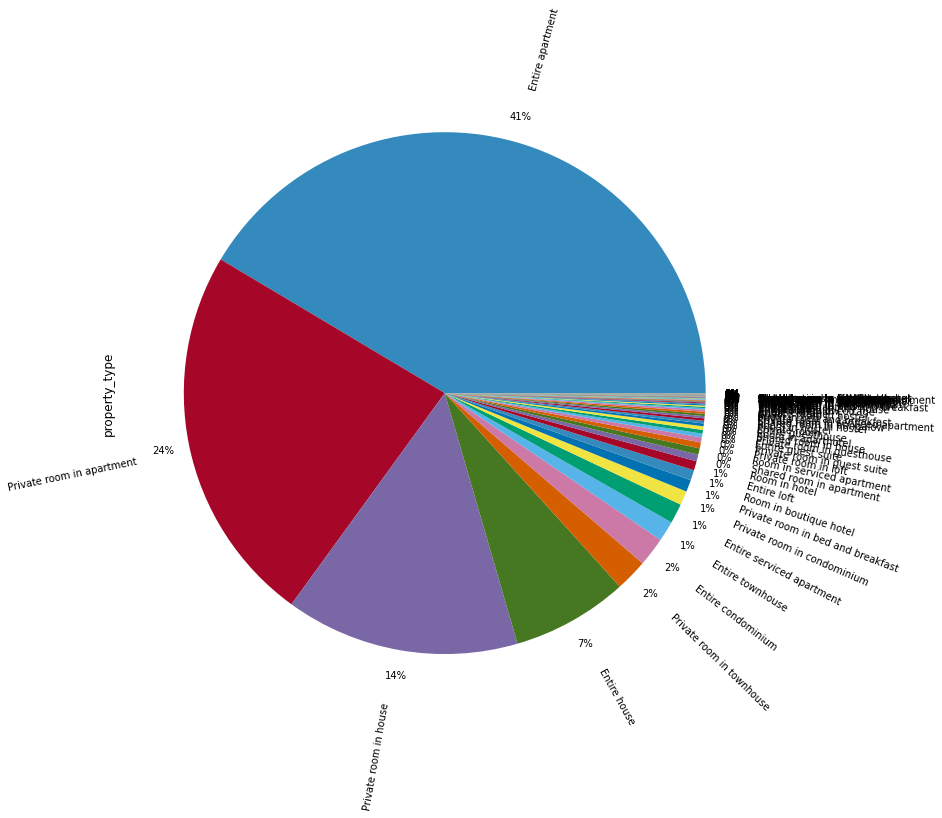

In [25]:
# calculate the percentage of each property type.
display(dfdict['listings']['property_type'].value_counts(normalize=True))

# plot the pie chart of property categories
plt.figure(figsize = (20, 12))
dfdict['listings']['property_type'].value_counts(normalize=True).plot.pie(autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2, rotatelabels=True)
plt.show()

By the above analysis, we can infer that the data set has a large number of Entire apartments, followed by Private rooms in apartment and then by Private rooms in houses and Entire houses. Also, among the properties with very small percentage, we have 'Shared room in bus', 'Shared room in hotel', 'Room in minsu', 'Shared room in tent' and 'Earth house'. 

#### 4.1.3. Numerical features

If the column or variable is numerical, then we’ll analyze it by calculating its mean, median, standard deviation, etc. We can get those values by using the describe function.

In [26]:
for name, df_ in dfdict.items():
    display(name)
    display(df_.describe())

'calendar'

,price,adjusted_price,minimum_nights,maximum_nights
count,2.793468e+07,2.793468e+07,2.793276e+07,2.793276e+07
mean,1.264199e+02,1.261539e+02,6.142188e+00,8.679454e+05
std,3.524370e+02,3.517111e+02,2.741382e+01,4.283477e+07
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
25%,4.500000e+01,4.400000e+01,1.000000e+00,9.000000e+01
50%,7.900000e+01,7.900000e+01,2.000000e+00,1.125000e+03
75%,1.340000e+02,1.330000e+02,4.000000e+00,1.125000e+03
max,1.774600e+04,1.774600e+04,1.125000e+03,2.147484e+09


'listings'

,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,7.653400e+04,7.653400e+04,33313.000000,41831.000000,76488.000000,76488.000000,76534.000000,76534.000000,76534.000000,71696.000000,...,52544.000000,52488.000000,52537.000000,52489.000000,52488.00000,76534.000000,76534.000000,76534.000000,76534.000000,54340.000000
mean,2.021021e+13,9.737649e+07,85.686249,81.239703,24.551982,24.551982,51.510066,-0.128113,3.041237,1.482454,...,9.284124,9.650720,9.670632,9.558365,9.30285,20.896621,17.543693,2.801043,0.037395,0.571656
std,0.000000e+00,1.026857e+08,28.177520,28.759014,134.118472,134.118472,0.047620,0.094883,1.938889,0.887224,...,1.188537,0.933248,0.931965,0.870299,1.08223,99.725744,96.391546,17.238188,0.512463,0.818797
min,2.021021e+13,2.010000e+03,0.000000,0.000000,0.000000,0.000000,51.297330,-0.510220,0.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.00000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,2.021021e+13,1.636504e+07,88.000000,74.000000,1.000000,1.000000,51.484460,-0.188308,2.000000,1.000000,...,9.000000,10.000000,10.000000,9.000000,9.00000,1.000000,0.000000,0.000000,0.000000,0.100000
50%,2.021021e+13,5.012855e+07,100.000000,96.000000,1.000000,1.000000,51.514250,-0.125730,2.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.00000,1.000000,1.000000,1.000000,0.000000,0.290000
75%,2.021021e+13,1.567602e+08,100.000000,100.000000,3.000000,3.000000,51.539520,-0.069172,4.000000,2.000000,...,10.000000,10.000000,10.000000,10.000000,10.00000,4.000000,1.000000,1.000000,0.000000,0.730000
max,2.021021e+13,3.876413e+08,100.000000,100.000000,7235.000000,7235.000000,51.679980,0.288570,16.000000,50.000000,...,10.000000,10.000000,10.000000,10.000000,10.00000,872.000000,871.000000,256.000000,18.000000,26.310000


'reviews'

,listing_id,reviewer_id
count,1.163886e+06,1.163886e+06
mean,1.611485e+07,9.051542e+07
std,1.147006e+07,8.523442e+07
min,1.391300e+04,1.000000e+00
25%,5.861116e+06,2.207885e+07
50%,1.534082e+07,6.068113e+07
75%,2.393473e+07,1.393357e+08
max,4.803946e+07,3.877384e+08


#### 4.1.3. a) Visualize Numerical Data Distributions — Histogram Plot of all features

Let's get all the types of our data from our dataset and take only the numerical ones.

In [27]:
df_num = dfdict['listings'].select_dtypes(include = ['float64', 'int64'])
df_num.head()

,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
13913,20210209201301,54730,100.0,67.0,3.0,3.0,51.56802,-0.11121,2,1.0,...,10.0,10.0,10.0,9.0,9.0,2,1,1,0,0.16
15400,20210209201301,60302,100.0,NaN,1.0,1.0,51.48796,-0.16898,2,1.0,...,10.0,10.0,10.0,10.0,9.0,1,1,0,0,0.66
17402,20210209201301,67564,0.0,100.0,18.0,18.0,51.52195,-0.14094,6,3.0,...,9.0,9.0,9.0,10.0,9.0,15,15,0,0,0.35
17506,20210209201301,67915,NaN,NaN,3.0,3.0,51.47935,-0.19743,2,1.0,...,NaN,NaN,NaN,NaN,NaN,2,0,2,0,NaN
25123,20210209201301,103583,NaN,100.0,3.0,3.0,51.57224,-0.20906,2,1.0,...,10.0,10.0,10.0,9.0,10.0,3,0,3,0,0.98


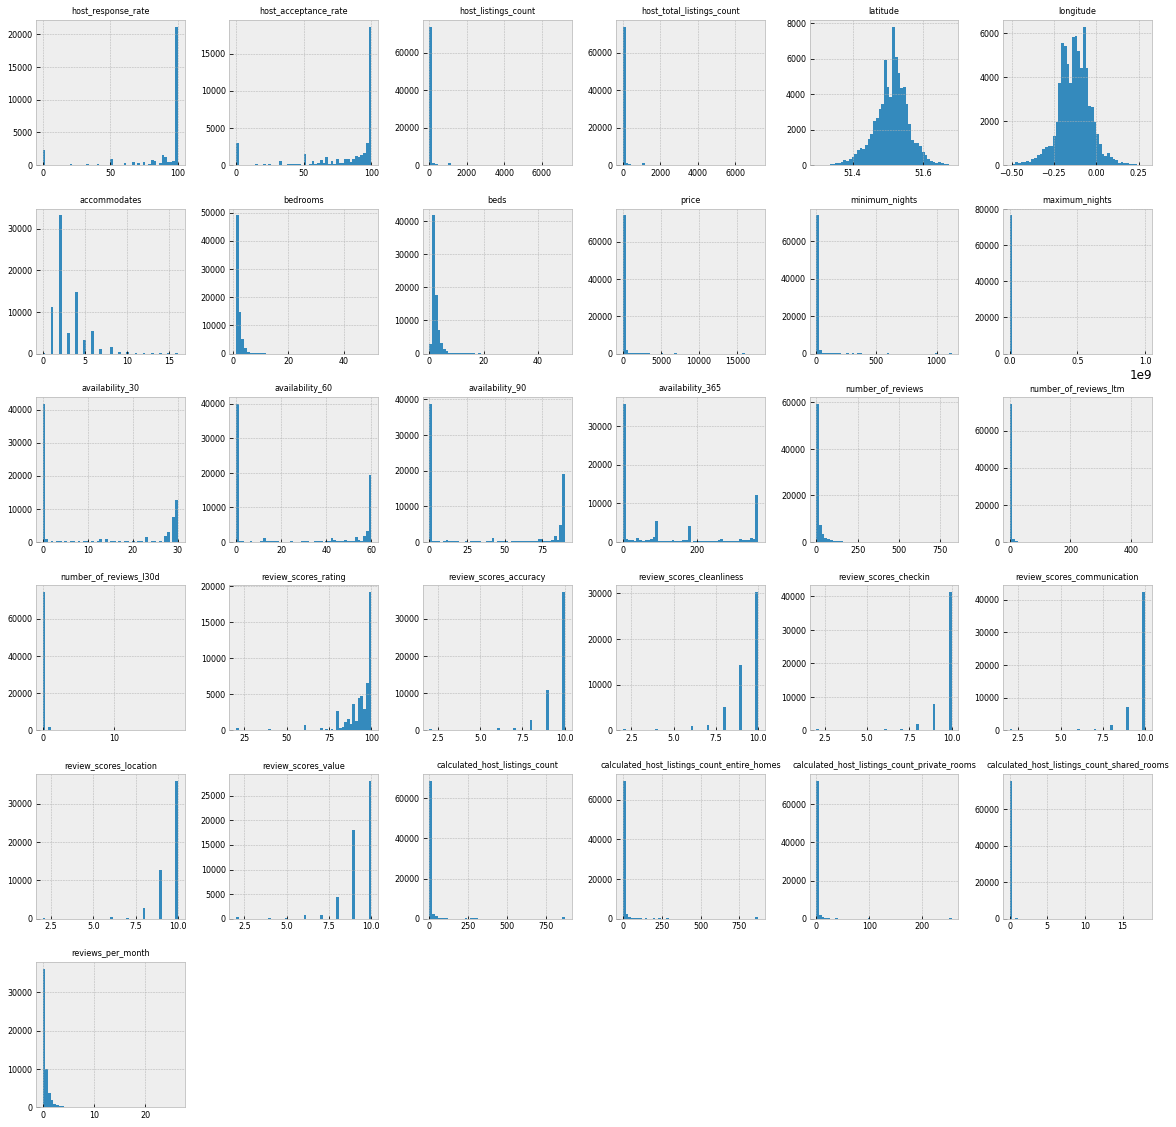

In [28]:
params = {'axes.titlesize':'8', 'xtick.labelsize':'12', 'ytick.labelsize':'12'}
plt.rcParams.update(params)
df_num.drop(columns=['scrape_id', 'host_id']).hist(figsize=(20, 20), bins=50, xlabelsize=8, ylabelsize=8, ); # ; avoid having the matplotlib verbose informations

Features such as `beds` and `bedrooms` seem to share a similar distribution to the one we have with `price`.

Regarding `review_scores_rating`, remark that the majority of scores are concentrated above 75%.

#### 4.1.3. b) Visualize Price Distributions — Seaborn Histogram

Let's take a look at how the property price is distributed.

count    76534.000000
mean       113.899051
std        313.830681
min          0.000000
25%         42.000000
50%         75.000000
75%        120.000000
90%        200.000000
95%        289.000000
98%        450.000000
99%        686.680000
99.7%     1250.000000
max      17746.000000
Name: price, dtype: float64


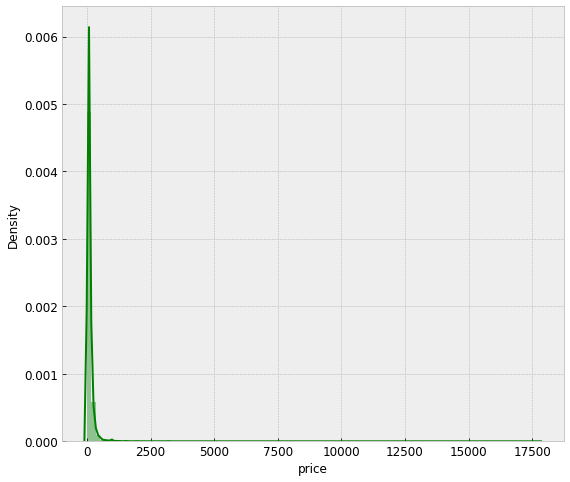

In [29]:
print(dfdict['listings']['price'].describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95, 0.98, 0.99, 0.997]))
plt.figure(figsize=(9, 8))
sns.distplot(dfdict['listings']['price'], color='g', bins=100, hist_kws={'alpha': 0.4});

With this information we can see that the prices are skewed right and some outliers lie above ~1250. Notice that the percentile 99.7% corresponds to this price of 1250 GBP.

Let's regenerate the graph after removing these outliers (`price > 1250 GBP`).

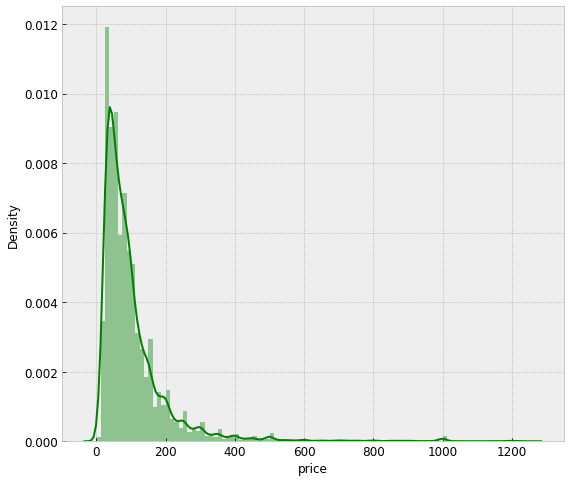

In [30]:
plt.figure(figsize=(9, 8))
sns.distplot(dfdict['listings'][dfdict['listings']['price'] <= 1250]['price'], color='g', bins=100, hist_kws={'alpha': 0.4});

#### 4.1.3. d) Box plot of 'price', 'review_scores_cleanliness' and 'review_scores_rating'


#### Property prices

First, let's take a look at the property price distribution.

Since there are some price outliers above the 1200 pounds range, we will filter them out when doing the box plots.

<AxesSubplot:title={'center':'Price distribution for properties that cost < GBP 1200'}, xlabel='room_type', ylabel='price'>

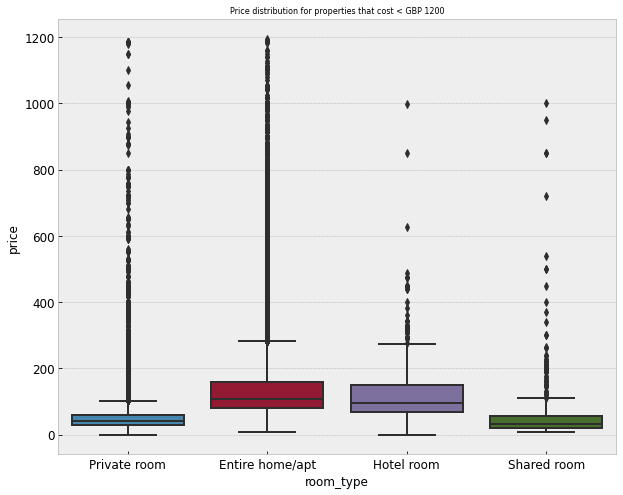

In [31]:
plt.figure(figsize=(10,8))
plt.title('Price distribution for properties that cost < GBP 1200')
sns.boxplot(y='price', x='room_type', data = dfdict['listings'][dfdict['listings']['price'] < 1200])

As expected, the average price of Entire home/apt is greater than Private rooms. Shared rooms are the cheapest properties.

#### Review scores

Let's see the distribution of review scores, grouped by room type.

<AxesSubplot:title={'center':'Review scores distribution for London Airbnb properties.'}, xlabel='room_type', ylabel='review_scores_rating'>

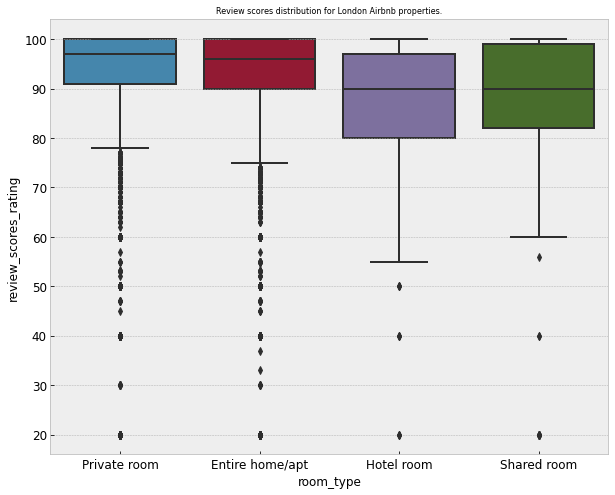

In [32]:
plt.figure(figsize=(10,8))  # 'review_scores_cleanliness', 'review_scores_rating'
plt.title('Review scores distribution for London Airbnb properties.')
sns.boxplot(y='review_scores_rating', x='room_type', data = dfdict['listings'][['room_type', 'review_scores_rating']])

We can see that the majority of the review scores is above 80, regardless of the room type.

#### 4.1.3. e) Calculate and Visualize Correlations — Seaborn Heat Map

 Let's see if some variables are linked between each other and then try to explain their relation with common sense.

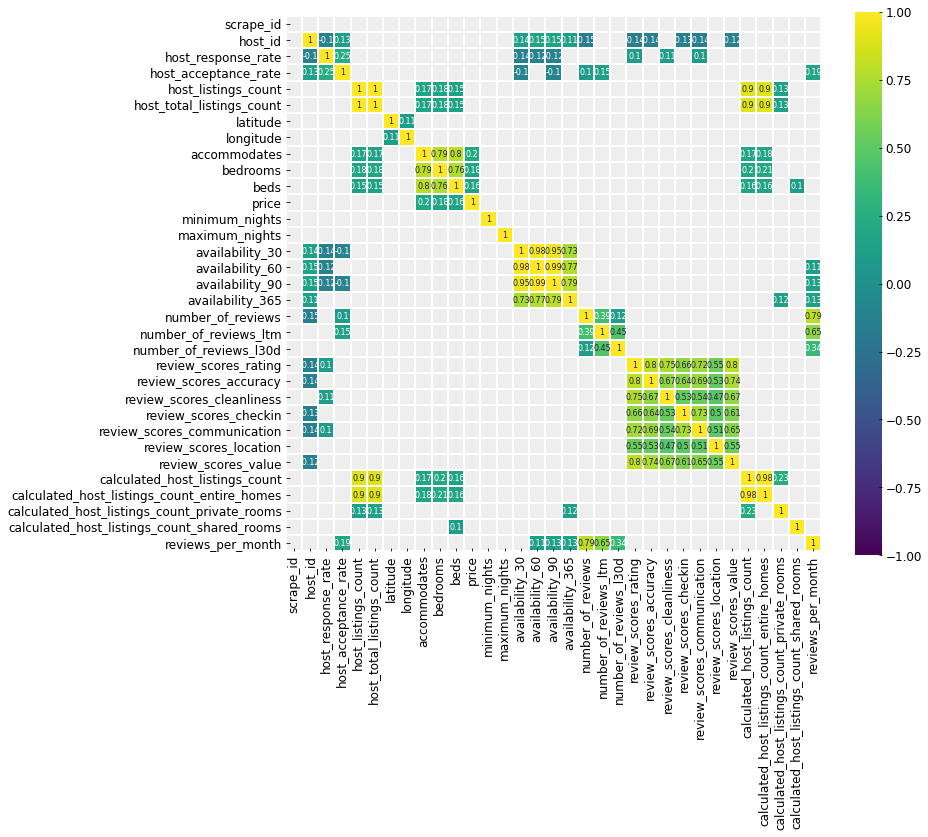

In [33]:
corr = df_num.corr()
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.1) | (corr <= -0.1)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

Only a few features seem to be correlated with each other. For example, 

* availability 30/60/90/365
* bedrooms/beds/accomodates
* review scores rating/accuracy/cleanliness/checkin/communication/value: the correlation between these columns indicates that, in a lot of cases, if a host has a good score (guest evaluation), s/he also has good scores related to cleanliness of the room/property, good communication with the guest and value, which makes sense.

The rest of the variables have very low correlation with each other. Against intuition, correlation between property price and review scores is very, very low...

#### 4.1.4.a) Visualize Categorical Data Distributions — Histogram Plot of all features

We'll now visualize the non-numerical features.

In [34]:
df_not_num = dfdict['listings'].select_dtypes(include = ['O'])
print('There are {} non numerical features including:\n{}'.format(len(df_not_num.columns), df_not_num.columns.tolist()))
df_not_num.head(4)

There are 14 non numerical features including:
['name', 'description', 'neighborhood_overview', 'host_location', 'host_about', 'host_response_time', 'host_neighbourhood', 'host_verifications', 'neighbourhood', 'neighbourhood_cleansed', 'property_type', 'room_type', 'bathrooms_text', 'amenities']


,name,description,neighborhood_overview,host_location,host_about,host_response_time,host_neighbourhood,host_verifications,neighbourhood,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities
id,,,,,,,,,,,,,,
13913,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,Finsbury Park is a friendly melting pot commun...,"London, England, United Kingdom",I am a Multi-Media Visual Artist and Creative ...,within a few hours,LB of Islington,"['email', 'phone', 'facebook', 'reviews', 'off...","Islington, Greater London, United Kingdom",Islington,Private room in apartment,Private room,1 shared bath,"[""Oven"", ""Shampoo"", ""Refrigerator"", ""Hangers"",..."
15400,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,It is Chelsea.,"Kensington, England, United Kingdom","English, grandmother, I have travelled quite ...",within a few hours,Chelsea,"['email', 'phone', 'reviews', 'jumio', 'govern...","London, United Kingdom",Kensington and Chelsea,Entire apartment,Entire home/apt,1 bath,"[""Refrigerator"", ""Shampoo"", ""Long term stays a..."
17402,Superb 3-Bed/2 Bath & Wifi: Trendy W1,You'll have a wonderful stay in this superb mo...,"Location, location, location! You won't find b...","London, England, United Kingdom",We are Liz and Jack. We manage a number of ho...,a few days or more,Fitzrovia,"['email', 'phone', 'reviews', 'jumio', 'offlin...","London, Fitzrovia, United Kingdom",Westminster,Entire apartment,Entire home/apt,2 baths,"[""Oven"", ""Shampoo"", ""Refrigerator"", ""Hangers"",..."
17506,Boutique Chelsea/Fulham Double bed 5-star ensuite,Enjoy a chic stay in this elegant but fully mo...,Fulham is 'villagey' and residential – a real ...,"London, England, United Kingdom","Named best B&B by The Times. Easy going hosts,...",NaN,Fulham,"['email', 'phone', 'jumio', 'selfie', 'governm...","London, United Kingdom",Hammersmith and Fulham,Private room in townhouse,Private room,1 private bath,"[""Shampoo"", ""Dedicated workspace"", ""Hangers"", ..."


#### But we need to remove columns with large text or sentences! E.g., name, description, neighborhood_overview, host_about.

In [35]:
# 'host_location' is a pretty large column, with the host's full address! We'll not consider it.
# 'host_neighbourhood' has way too many values, let's ignore it.
# 'host_verifications' and 'amenities' are multi-value column. 
# TODO Include 'host_acceptance_rate', 'host_response_rate'
df_not_num = df_not_num[['neighbourhood_cleansed', 'property_type', 'room_type', 'host_response_time', 'bathrooms_text']]

 Let's look at their distribution.

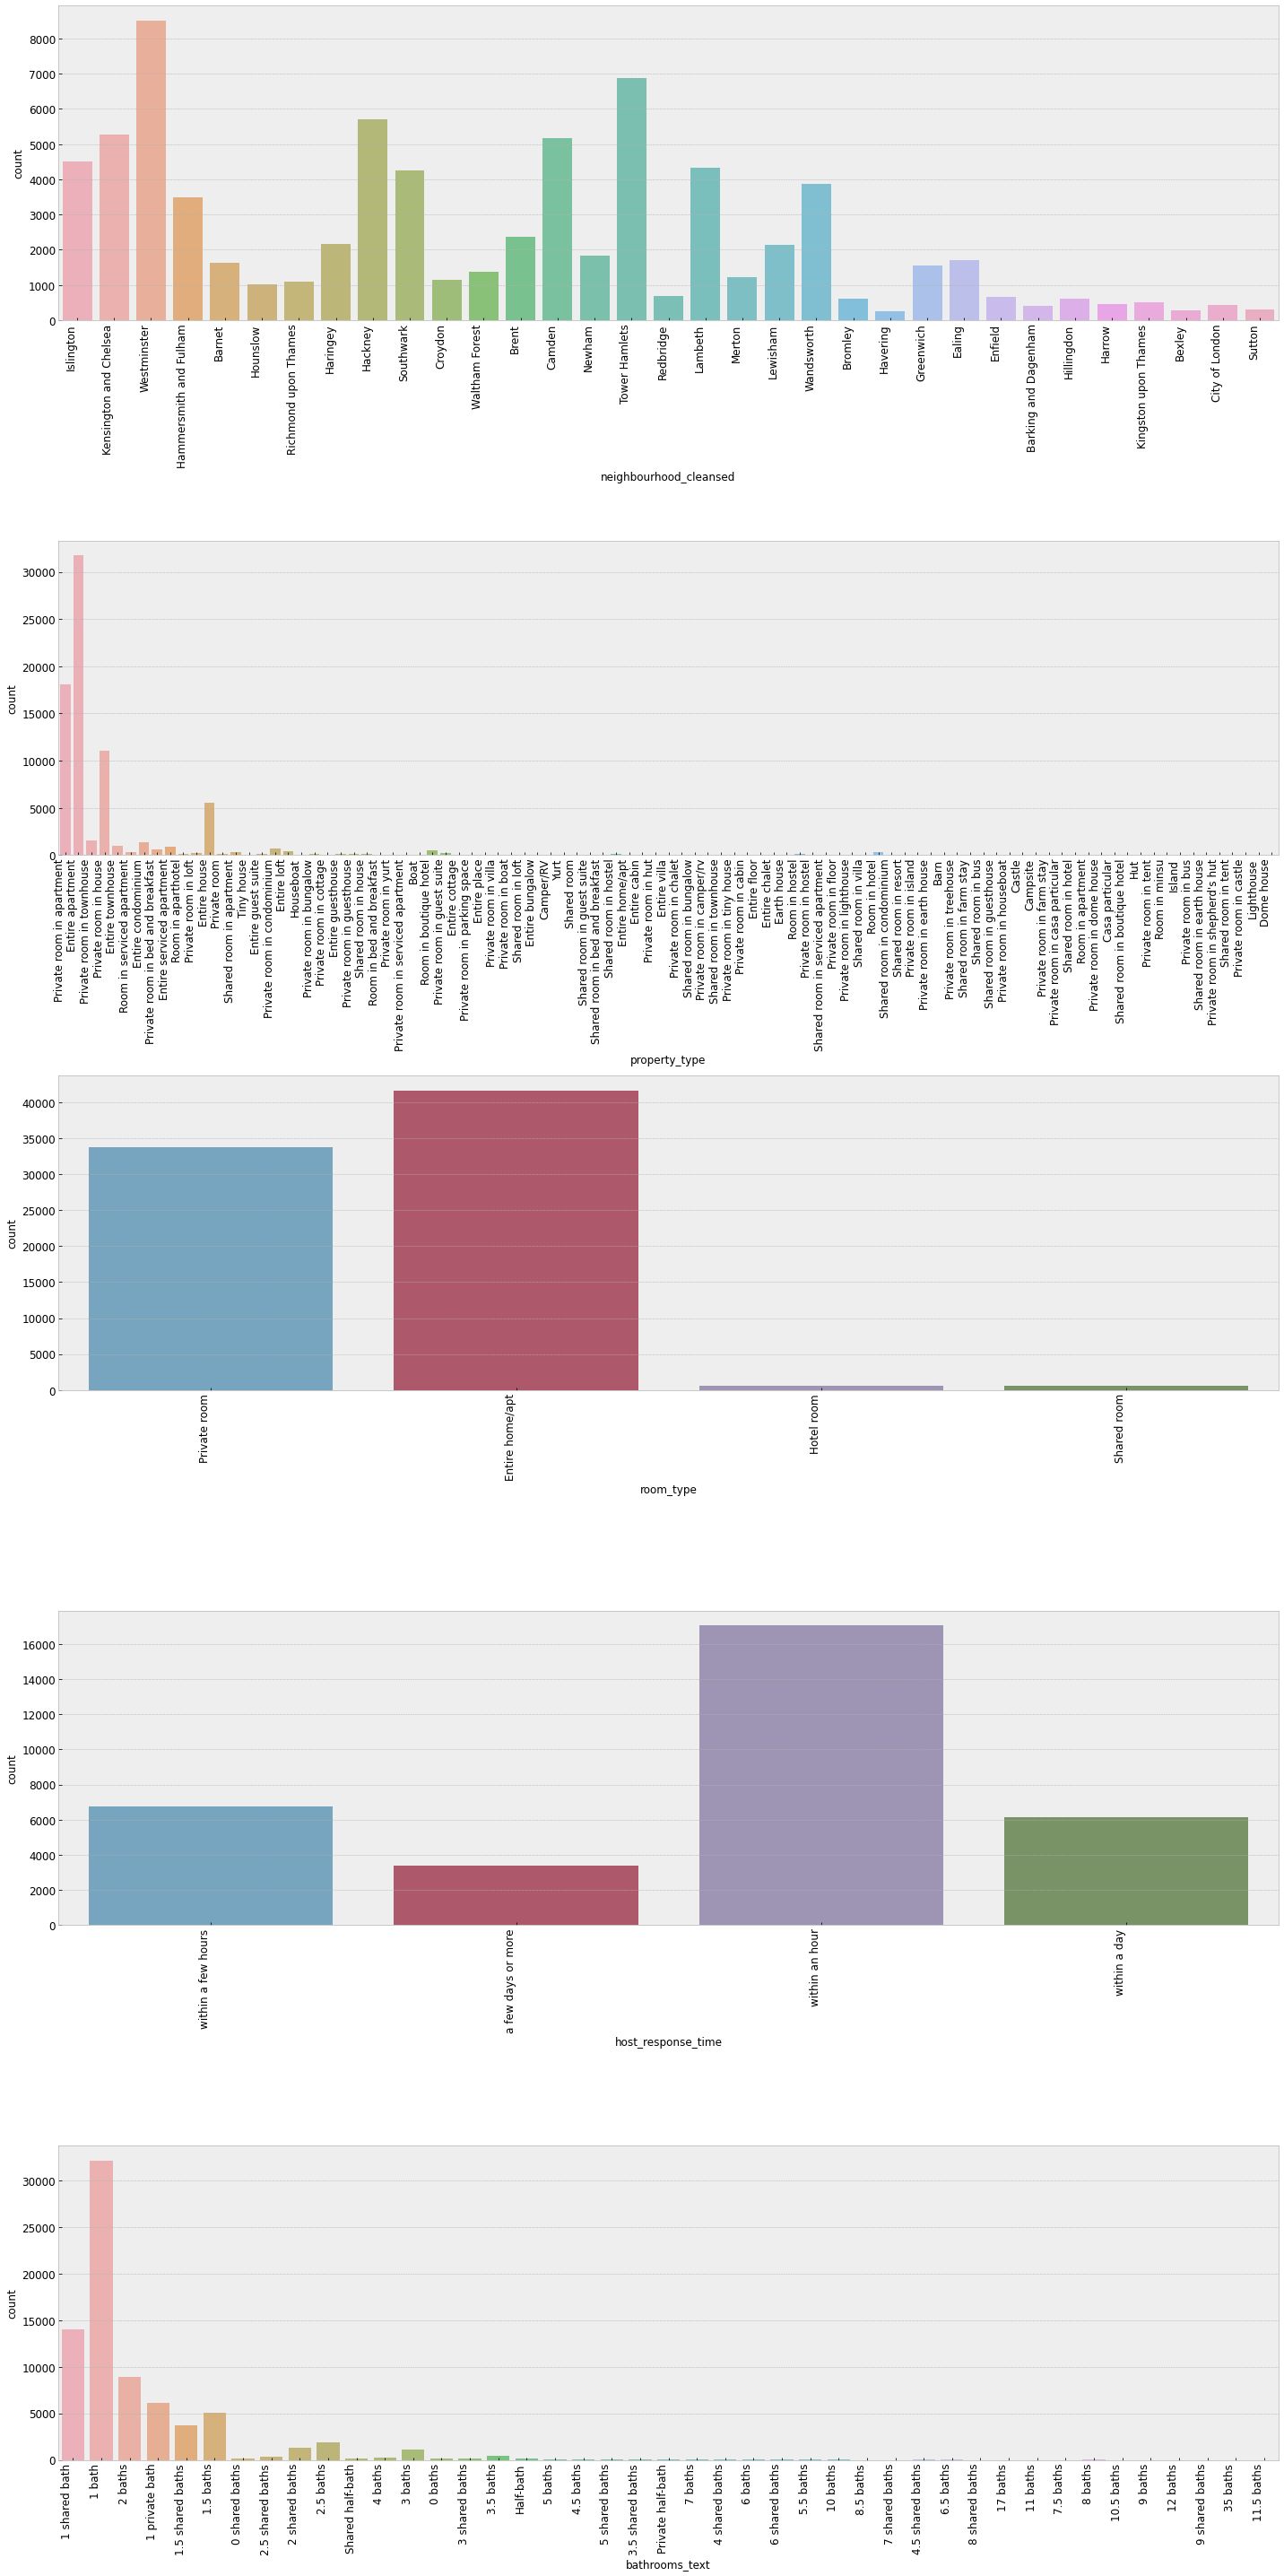

In [36]:
ncols = 1

fig, axes = plt.subplots(round(len(df_not_num.columns) / ncols), ncols, figsize=(20, 40))
#plt.xticks(rotation=90)

for i, ax in enumerate(fig.axes):
    if i < len(df_not_num.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, ha="right")
        sns.countplot(x=df_not_num.columns[i], alpha=0.7, data=df_not_num, ax=ax)

fig.tight_layout()

We have already analyzed neighborhood frequency in a previous graph.

We can see that the majority of properties are of the following types: `Private room in apartment`, `Entire apartment`, `Entire townhouse`, `Entire house`, `Private room in townhouse`, `Entire condominium` and `Entire serviced apartment`.

When it comes to `room_type`, the vast majority are `private rooms` and `entire home/apartments`.

Normally, hosts give a response to their guests within an hour (more than 16000 hosts lie in this category). Less than 4000 hosts take more than a day/a few days or more to answer. 

## 4.2. Bivariate Analysis

If we analyze data by taking two variables/columns into consideration from a dataset, it is known as Bivariate Analysis.

### 4.2.1. Numeric-Numeric Analysis

Analyzing the two numeric variables from a dataset is known as numeric-numeric analysis. We can analyze it in three different ways.

* Scatter Plot
* Pair Plot
* Correlation Matrix

#### 4.2.1. a) Scatter plot

Let’s take the columns ‘price’, ‘review_scores_cleanliness’ and 'review_scores_rating' from our dataset and see what we can infer by plotting to scatter plot.

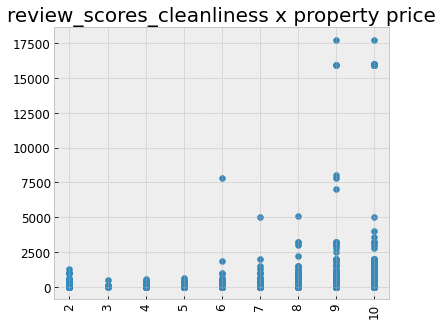

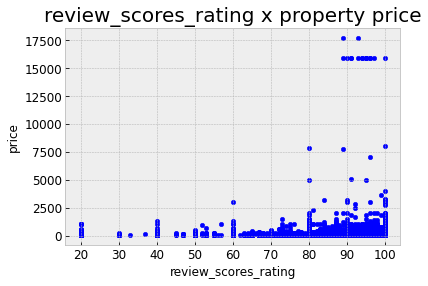

In [37]:
# plot the scatter plot of neighborhood and price variable in data
plt.figure(figsize=(6, 5))
plt.scatter(dfdict['listings'].review_scores_cleanliness, dfdict['listings'].price)
plt.xticks(rotation=90)
plt.title('review_scores_cleanliness x property price', fontsize =20)
plt.show()

# plot the scatter plot of review_scores_rating and price variable in data
dfdict['listings'].plot.scatter(x="review_scores_rating",y="price")
plt.title('review_scores_rating x property price', fontsize =20)
plt.show()

There is not a clear correlation between property rating and the price. 

But... In the second graph, we can see that high-priced properties (`> 5000 GBP`) have only high review-scores ratings (`above 80`). 

#### 4.2.1. b) Pair Plot

Now, let’s plot Pair Plots for some other numerical columns. We’ll use the seaborn library for plotting Pair Plots.

<Figure size 720x360 with 0 Axes>

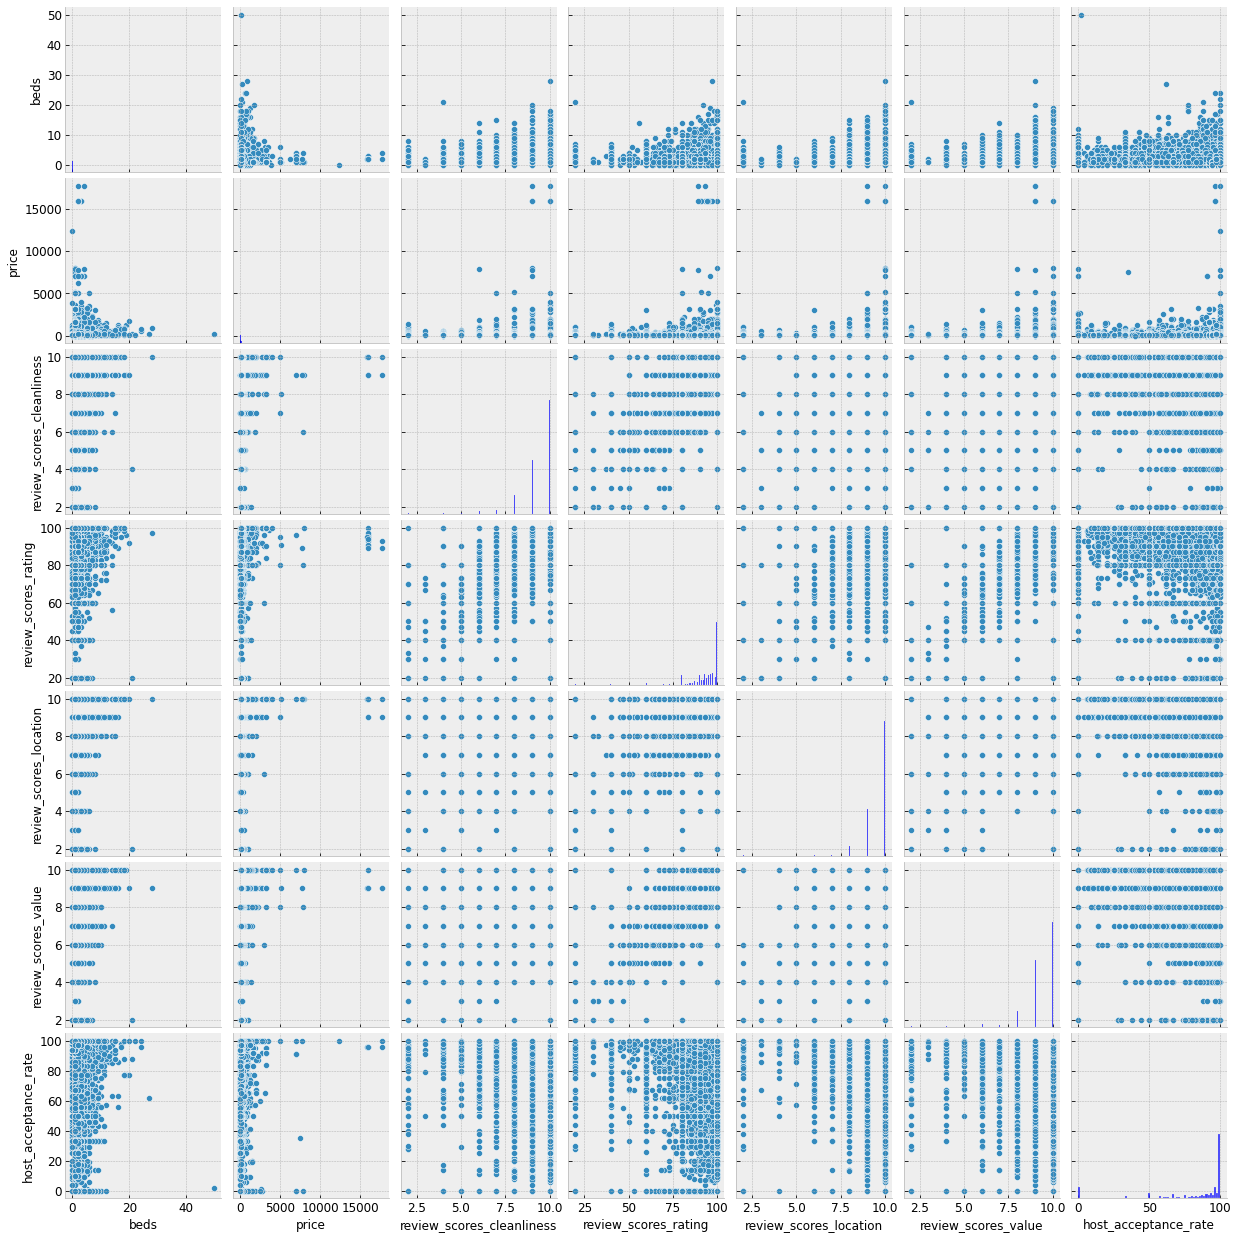

In [38]:
# plot the pair plot of beds, price and property review scores in dataframe
plt.figure(figsize = (10, 5))
sns.pairplot(data = dfdict['listings'], vars=['beds', 'price', 'review_scores_cleanliness', 'review_scores_rating', 
                                              'review_scores_location', 'review_scores_value', 'host_acceptance_rate'])
plt.show()

It is difficult to find a trend between 2 different variables in the above graph.

#### 4.2.1. c) Correlation Matrix

Since we cannot use more than two variables as x-axis and y-axis in Scatter and Pair Plots, it is difficult to see the relation between three numerical variables in a single graph. In those cases, we’ll use the correlation matrix.

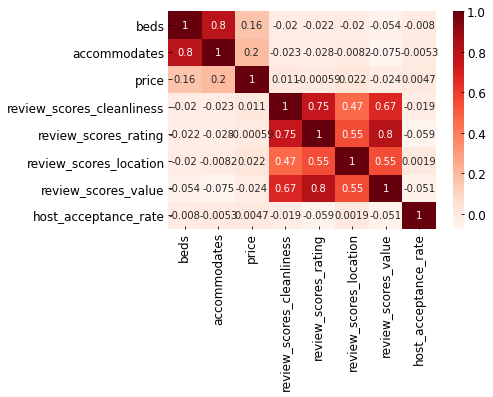

In [39]:
# Creating a matrix using beds, accommodates, price and some review scores as rows and columns
xpto = dfdict['listings'][['beds','accommodates','price', 'review_scores_cleanliness', 'review_scores_rating',
                          'review_scores_location', 'review_scores_value', 'host_acceptance_rate']].corr()

# plot the correlation matrix of these columns in data dataframe
sns.heatmap(xpto, annot=True, cmap = 'Reds')
plt.show()

Now let's try to find which features are strongly correlated with `price`. We'll reuse our df_num dataset (created in 4.1.3.a) to do so.

In [40]:
df_num.corr()['price']

scrape_id                                            NaN
host_id                                         0.017149
host_response_rate                             -0.009714
host_acceptance_rate                            0.004743
host_listings_count                             0.067280
host_total_listings_count                       0.067280
latitude                                       -0.003358
longitude                                      -0.033128
accommodates                                    0.197706
bedrooms                                        0.184903
beds                                            0.162481
price                                           1.000000
minimum_nights                                  0.030365
maximum_nights                                 -0.001003
availability_30                                 0.038614
availability_60                                 0.036657
availability_90                                 0.035664
availability_365               

In [41]:
df_num_corr = df_num.corr()['price'][:-1] # -1 because it is the latest row in df_num
golden_features_list = df_num_corr[abs(df_num_corr) > 0.1].sort_values(ascending=False)
print("There are {} correlated columns with respect to 'price':\n{}".format(len(golden_features_list), golden_features_list))

There are 4 correlated columns with respect to 'price':
price           1.000000
accommodates    0.197706
bedrooms        0.184903
beds            0.162481
Name: price, dtype: float64


Correlation is very weak for these variables (`c < 0.2`).

### 4.2.2. Numeric - Categorical Analysis

Analyzing the one numeric variable and one categorical variable from a dataset is known as numeric-categorical analysis. We analyze them mainly using mean, median, and box plots.

Let’s take price and neighborhood columns from our dataset.
First check for mean value using groupby.

#### 4.2.2. a) Comparing mean and median values of price

In [42]:
# groupby the listings df to find the mean of the property price according to the city neighborhood.
dfdict['listings'].groupby('neighbourhood_cleansed')['price'].mean()

neighbourhood_cleansed
Barking and Dagenham       64.480100
Barnet                     84.699023
Bexley                     59.003623
Brent                      97.217650
Bromley                    71.098333
Camden                    125.717127
City of London            258.104308
Croydon                    56.724320
Ealing                     95.546580
Enfield                    69.067873
Greenwich                  83.785623
Hackney                    87.836399
Hammersmith and Fulham    118.974836
Haringey                   86.695111
Harrow                     73.352679
Havering                   72.742188
Hillingdon                 61.622793
Hounslow                   86.697059
Islington                 144.307487
Kensington and Chelsea    175.704636
Kingston upon Thames       84.071845
Lambeth                    90.198196
Lewisham                   78.676758
Merton                    108.016207
Newham                     85.736699
Redbridge                  72.352174
Richmond upon T

There is a lot of price difference between the neighborhoods. `City of London` has an average price of 258 pounds, while `Bexley` costs on average 59 pounds. This gives us a price difference of 199 pounds!

Let’s calculate the median,

In [43]:
# groupby the listings df to find the median of the property price according to the city neighborhood.
dfdict['listings'].groupby('neighbourhood_cleansed')['price'].median()

neighbourhood_cleansed
Barking and Dagenham       45.0
Barnet                     55.0
Bexley                     40.0
Brent                      60.0
Bromley                    50.0
Camden                     90.0
City of London            119.0
Croydon                    40.0
Ealing                     50.0
Enfield                    48.0
Greenwich                  60.0
Hackney                    70.0
Hammersmith and Fulham     85.0
Haringey                   50.0
Harrow                     48.0
Havering                   50.0
Hillingdon                 45.0
Hounslow                   60.0
Islington                  80.0
Kensington and Chelsea    120.0
Kingston upon Thames       55.0
Lambeth                    66.0
Lewisham                   50.0
Merton                     65.0
Newham                     52.0
Redbridge                  45.0
Richmond upon Thames       85.0
Southwark                  71.0
Sutton                     45.0
Tower Hamlets              64.0
Waltham Forest   

The median appears to be less sensitive to outliers. Now, we have: `City of London` with a median price of 119 pounds and `Bexley` with a median cost of 40 pounds. The median indicates a price difference of 79 pounds, against an average price difference of 199 pounds.

#### 4.2.2. b) Plot the bar graph of neighborhood x average value of price

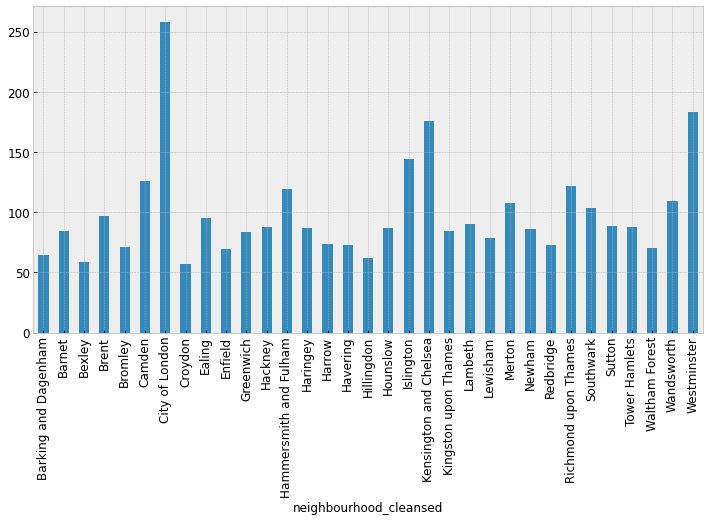

In [44]:
plt.figure(figsize = (12, 6))
dfdict['listings'].groupby('neighbourhood_cleansed')['price'].mean().plot.bar()
plt.show()

By the above graph, we can infer that the property price is, on average, higher for more central locations, like City of London and Westminster. 

#### 4.2.2. c) Boxplot of the price in function of the neighborhood

Besides median and average values, it is important to observe the interquantile ranges (25%-75%), minimum and maximum values. The box plot gives us this information visually.

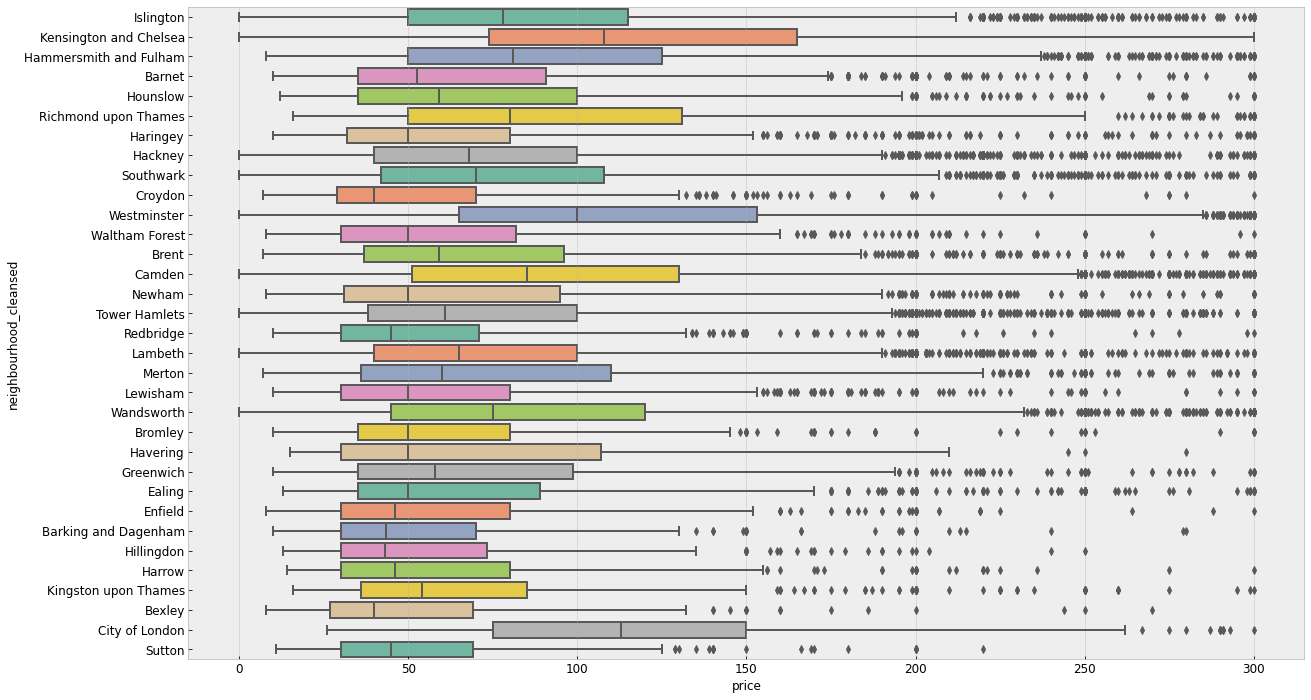

In [45]:
# plot the box plot of price according to neighborhood, after removing outliers where price > 300 GBP
plt.figure(figsize = (20, 12))
df_filtered = dfdict['listings'][dfdict['listings'].price <= 300]
sns.boxplot(df_filtered.price, df_filtered.neighbourhood_cleansed, orient="h", palette="Set2")
plt.show()

As we can see, when we plot the Box Plot, it paints a very different picture compared to mean and median. `City of London`, for instance, has the greatest minimum property price, and, together with `Kensignton and Chelsea` and `Westminster`, has the highest prices considering the IQR [25%-75&].

#### 4.2.2. d) Time series plot of price and availability

Let's use the `calendar` dataframe to analyze the evolution of price and availability through time.

There are 27 million lines on the calendar dataframe. Let's see how many different dates we have.

In [46]:
dfdict['calendar']

available  price  adjusted_price  minimum_nights  \
listing_id date                                                           
100326     2021-02-13      False   33.0            33.0             2.0   
13913      2021-02-12       True   40.0            40.0             1.0   
           2021-02-13       True   40.0            40.0             1.0   
           2021-02-14       True   40.0            40.0             1.0   
           2021-02-15       True   40.0            40.0             1.0   
...                          ...    ...             ...             ...   
48100754   2022-02-07       True   64.0            64.0           148.0   
           2022-02-08       True   64.0            64.0           148.0   
           2022-02-09       True   64.0            64.0           148.0   
           2022-02-10       True   64.0            64.0           148.0   
           2022-02-11       True   64.0            64.0           148.0   

                       maximum_nights  
listing_id date                        
100326     2021-02-13            10.0  
13913      2021-02-12            29.0  
           2021-02-13            29.0  
           2021-02-14            29.0  
           2021-02-15            29.0  
...                               ...  
48100754   2022-02-07           365.0  
           2022-02-08           365.0  
           2022-02-09           365.0  
           2022-02-10           365.0  
           2022-02-11           365.0  

[27935194 rows x 5 columns]

The property listings refer to periods starting at Feb 2021 until Feb 2022.

In [47]:
print('There are', dfdict['calendar'].reset_index()['date'].nunique(), 'days and', 
      dfdict['calendar'].reset_index()['listing_id'].nunique(), 'unique listings on calendar df.')

There are 377 days and 76531 unique listings on calendar df.


Let's define a new 0/1 column to show availability.

In [48]:
dfdict['calendar']['occupied'] = dfdict['calendar']['available'].astype(float) * 100.0

#### Average price by day

Text(0, 0.5, 'Property price')

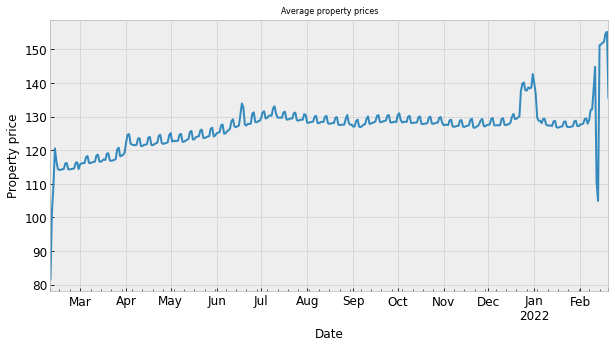

In [49]:
avg_daily_price = dfdict['calendar'].reset_index().groupby('date').mean()
#print(avg_daily_price)
# Plotting the Graph
plt.figure(figsize=(10, 5))
price_plot_by_day = avg_daily_price['price'].plot(title='Average property prices')
price_plot_by_day.set_xlabel('Date')
price_plot_by_day.set_ylabel('Property price')

Property prices have their lowest values on the start of the dataset (Mar, Apr, May), and they start to rise until July (summer season). From July on, they remain stable. Finally price hit a peak near Christmas and New Year's eve. 

There is also a strange valley in Fev 2022...

#### Average availability by day

              listing_id  available       price  adjusted_price  \
date                                                              
2021-02-09  4.666737e+07        0.0   81.666667       81.666667   
2021-02-10  3.211885e+07   0.003562  101.800554      101.676494   
2021-02-11  2.316150e+07   0.026834  109.192484      108.424540   
2021-02-12  2.577824e+07   0.192099  120.539977      119.539591   
2021-02-13  2.613702e+07   0.287073  116.766780      115.869622   
...                  ...        ...         ...             ...   
2022-02-16  2.305985e+07        0.0  152.000000      152.000000   
2022-02-17  2.305985e+07        0.0  152.250000      152.250000   
2022-02-18  2.305985e+07        0.0  154.750000      154.750000   
2022-02-19  2.305985e+07        0.0  155.250000      155.250000   
2022-02-20  2.305985e+07        0.0  135.500000      135.500000   

            minimum_nights  maximum_nights   occupied  
date                                                   
2021-02-09      

Text(0, 0.5, 'Property Occupancy')

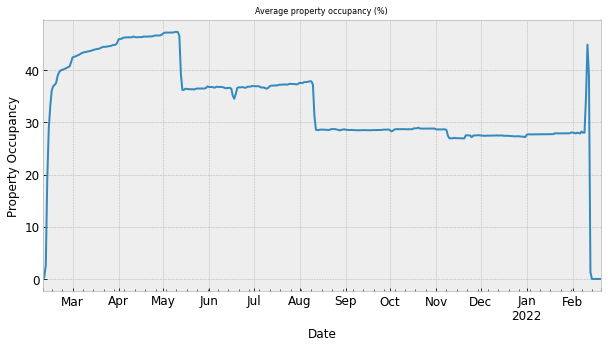

In [50]:
avg_daily_occupancy = dfdict['calendar'].reset_index().groupby('date').mean()
print(avg_daily_occupancy)
# Plotting the Graph
plt.figure(figsize=(10, 5))
occupancy_plot_by_day = avg_daily_occupancy['occupied'].plot(title='Average property occupancy (%)')
occupancy_plot_by_day.set_xlabel('Date')
occupancy_plot_by_day.set_ylabel('Property Occupancy')

#### Average % Property Occupancy for 2021 (i.e. the % of properties already booked, by day) oscillates between 27% and almost 50%, depending on the month.

**Note: I gave up joining the `listing` and `calendar` dataframes, because of OutOfMemory errors in Kaggle Jupyter Kernel :-(**

df = dfdict['calendar'].join(dfdict['listings'], on='listing_id', rsuffix='_listing')

df.head(6)
sns.lineplot(x="date", y="occupied",
             hue="", style="event",
             data=avg_daily_price)

### 4.2.3. Categorical — Categorical Analysis

Let's see how the different categories like neighborhood, property_type, etc., are associated with each other. 

#### 4.2.3. a) Category plot of neighborhood, room type and price in dataframe `listings`

first_10_neihborhoods:  ['Islington' 'Kensington and Chelsea' 'Westminster'
 'Hammersmith and Fulham' 'Barnet' 'Hounslow' 'Richmond upon Thames'
 'Haringey' 'Hackney' 'Southwark']


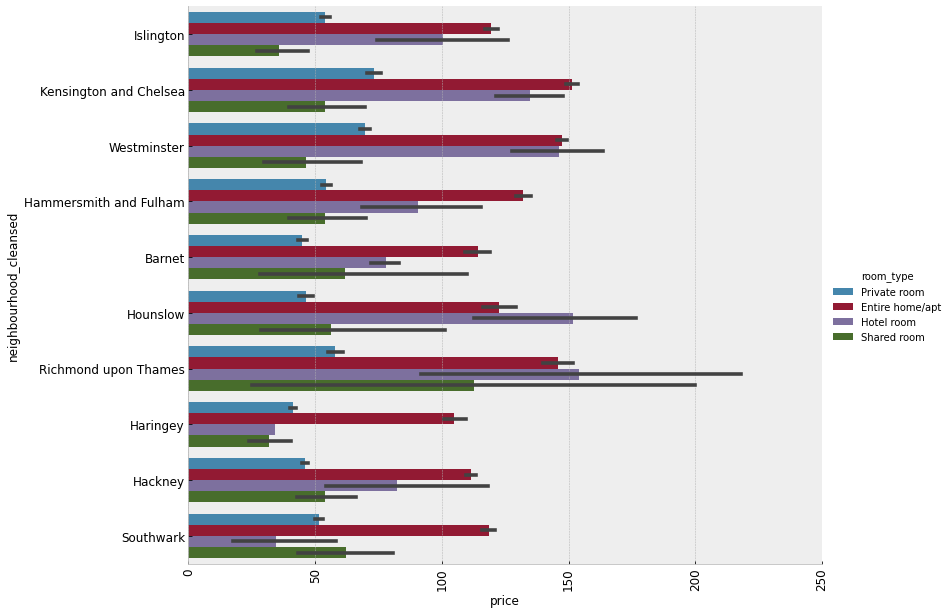

In [51]:
first_10_neihborhoods = dfdict['listings']['neighbourhood_cleansed'].unique()[0:10]
print('first_10_neihborhoods: ', first_10_neihborhoods)
df_filtered = dfdict['listings'][dfdict['listings']['price'] < 400]
df_filtered = df_filtered[df_filtered['neighbourhood_cleansed'].isin(first_10_neihborhoods)]
g = sns.catplot(y="neighbourhood_cleansed", x="price", hue="room_type", kind="bar", data=df_filtered, height=8.27, aspect=11.7/8.27)
g.set_xticklabels(rotation=90)

Impressive. Sometimes a hotel room can be more expensive than an entire home/apt! For example, this happens in Hounslow and Richmond upon Thames.

## 4.3. Multivariate Analysis

If we analyze data by taking more than two variables/columns into consideration from a dataset, it is known as Multivariate Analysis.
Let’s see how ‘neighborhood_cleansed’, ‘bedrooms’, and ‘price’ vary with each other.
We’ll create a pivot table with the three columns and after that, we’ll create a heatmap.

Pivot table:
 bedrooms                      1.0         2.0         3.0         4.0   \
neighbourhood_cleansed                                                   
Barking and Dagenham     50.673203  105.204545  123.944444  131.888889   
Barnet                   59.326705  108.961390  178.195876  199.754098   
Bexley                   45.386139   84.272727  105.833333  182.666667   
Brent                    65.328032  131.181009  171.567010  295.929577   
Bromley                  55.342995  100.227723  113.878049  170.666667   
Camden                   92.060148  158.978836  235.627297  356.707547   
City of London          288.537102  191.000000  227.583333  375.000000   
Croydon                  46.330626   91.302817  115.285714  139.000000   
Ealing                   78.599661  100.417021  184.169492  213.539683   
Enfield                  50.572939  106.988095  125.916667  200.411765   
Greenwich                56.932020  125.821678  140.483871  201.023810   
Hackney                 

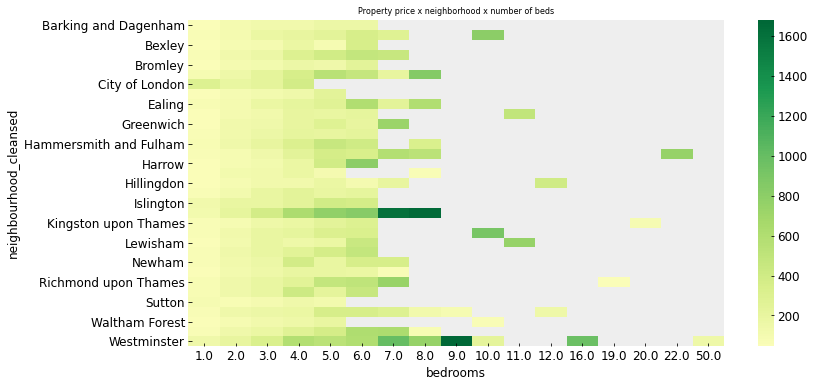

In [52]:
result = pd.pivot_table(data=dfdict['listings'], index='neighbourhood_cleansed', columns='bedrooms',values='price')
print('Pivot table:\n', result)

# create heat map of neighbourhood vs price vs availability_rate
plt.figure(figsize = (12, 6))
ax = plt.axes()
sns.heatmap(result, annot=False, cmap = 'RdYlGn', center=0.117, ax=ax)
ax.set_title('Property price x neighborhood x number of beds')
plt.show()

Based on the Heatmap above, we can infer that more expensive properties usually have more beds available. Additionally, on more expensive neighborhoods, such as City of London, Westminster and Islington, smaller properties have high prices too. 

### TODO Other ideas: heat maps (using latitude and longitude) and tag clouds (using textual information from property listings, reviews, etc.).